## Importation 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import ast
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords


In [2]:
file_movie = 'data/movie.metadata.tsv'
movie_metadata_df = pd.read_csv(file_movie, sep='\t', header=None)


In [3]:
movie_metadata_df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [4]:
# Set columns names

movie_metadata_df.columns = [
    'Wikipedia movie ID',
    'Freebase movie ID',
    'Movie name',
    'Movie release date',
    'Movie box office revenue',
    'Movie runtime',
    'Movie languages',
    'Movie countries',
    'Movie genres'
]

In [5]:

movie_metadata_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
len(movie_metadata_df)

81741

In [7]:
movie_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wikipedia movie ID        81741 non-null  int64  
 1   Freebase movie ID         81741 non-null  object 
 2   Movie name                81741 non-null  object 
 3   Movie release date        74839 non-null  object 
 4   Movie box office revenue  8401 non-null   float64
 5   Movie runtime             61291 non-null  float64
 6   Movie languages           81741 non-null  object 
 7   Movie countries           81741 non-null  object 
 8   Movie genres              81741 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.6+ MB


## % ou lieu de count

Text(0.5, 1.0, 'Number of NaN Values per Column')

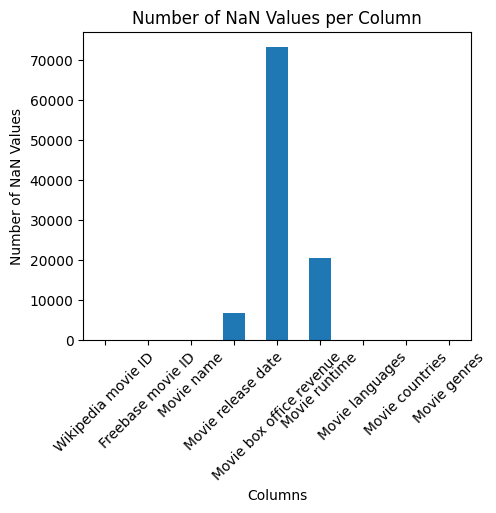

In [8]:
# Calculate the number of NaN values in each column
na_counts = movie_metadata_df.isna().sum()#/len(movie_metadata_df)*100

# Plotting the NaN counts as a bar chart
plt.figure(figsize=(5, 4))
na_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.ylabel('Number of NaN Values')
plt.title('Number of NaN Values per Column')


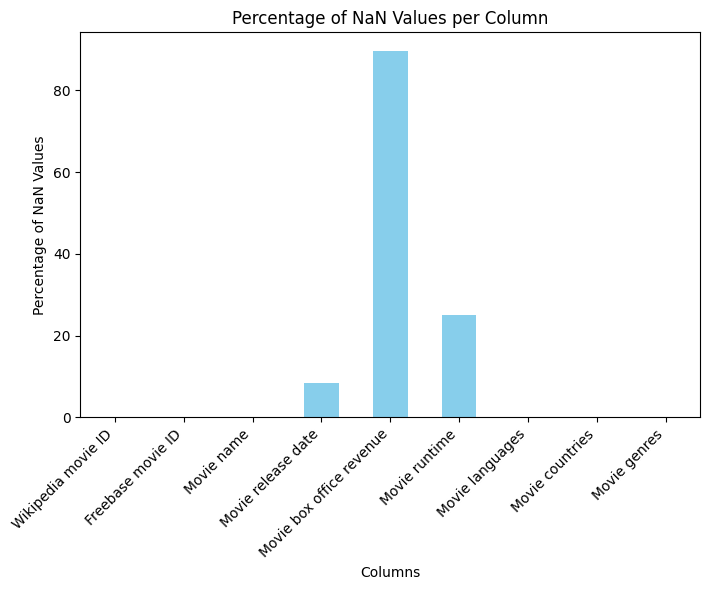

In [9]:
na_percentage = (movie_metadata_df.isna().sum() / len(movie_metadata_df)) * 100

plt.figure(figsize=(8, 5))
na_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage of NaN Values')
plt.title('Percentage of NaN Values per Column')

plt.show()

In [10]:
missing_BoxOffice = movie_metadata_df['Movie box office revenue'].isna().sum()

# Calculate the percentage of missing values
missing_percentage_Box = (missing_BoxOffice / len(movie_metadata_df)) * 100
missing_percentage_Box.round(2)

89.72

In [11]:
missing_date = movie_metadata_df['Movie release date'].isna().sum()

# Calculate the percentage of missing values
missing_percentage_date = (missing_date / len(movie_metadata_df)) * 100
missing_percentage_date.round(2)

8.44

In [12]:
missing_runtime = movie_metadata_df['Movie runtime'].isna().sum()

# Calculate the percentage of missing values
missing_percentage_runtime = (missing_runtime / len(movie_metadata_df)) * 100
missing_percentage_runtime.round(2)

25.02

A voir si c'est quelque chose qui nous intéresse ou pas

Very few information on Movie box office revenue 

# EDA (PLOT)

In [63]:
metadata_df = movie_metadata_df.copy()

In [64]:
print(metadata_df['Movie genres'].apply(type).value_counts())
print(metadata_df['Movie release date'].apply(type).value_counts())

Movie genres
<class 'str'>    81741
Name: count, dtype: int64
Movie release date
<class 'str'>      74839
<class 'float'>     6902
Name: count, dtype: int64


In [65]:
def convert_to_list(df, column_name):
    #Convert to dictionnary 
    df[column_name] = df[column_name].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    #Convert to list
    df[column_name] = df[column_name].apply(lambda x: list(x.values()) if isinstance(x, dict) else None)
    return df[column_name]


Convert the columns that look like dictionnary in lists

In [66]:
metadata_df['Movie genres'] = convert_to_list(metadata_df, 'Movie genres')
metadata_df['Movie languages'] = convert_to_list(metadata_df, 'Movie languages')
metadata_df['Movie countries'] = convert_to_list(metadata_df, 'Movie countries')

J'ai regarder la date en ligne il y a une typo c'est en 2010 pas 1010 jsp si c'est mieux de l'enelver ou changer la date (ici je l'ai changé) 

In [67]:
release_date = metadata_df .iloc[62836]['Movie release date']
release_date

'1010-12-02'

In [68]:
wikipedia_id = metadata_df .iloc[62836]['Wikipedia movie ID']
wikipedia_id

29666067

In [69]:
metadata_df .at[62836, 'Movie release date'] = "2010-12-02"

# Verify the change
print("Updated Release Date at position 62836:", metadata_df .at[62836, 'Movie release date'])

Updated Release Date at position 62836: 2010-12-02


In [70]:
metadata_df['Movie release date'] = pd.to_datetime(metadata_df['Movie release date'], errors='coerce')
metadata_df['Movie release date'] = pd.to_datetime(metadata_df['Movie release date']).dt.year.astype('Int64')

In [71]:
metadata_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,<NA>,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,<NA>,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,<NA>,NaN,106.0,[German Language],[Germany],[Drama]


In [73]:
#Remove the years that are NaN as we are intereseted in date
nan_count = metadata_df['Movie release date'].isna().value_counts()
metadata_df = metadata_df.dropna(subset=['Movie release date'])
#metadata_df['Movie release date'].isna().value_counts()
print(nan_count)

Movie release date
False    39373
Name: count, dtype: int64


In [23]:
metadata_df.shape

(39373, 9)

## Movie Languages

In [24]:
all_languages = metadata_df['Movie languages'].explode()

language_counts = all_languages.value_counts()

print(language_counts)

Movie languages
English Language          23802
Silent film                2250
French Language            1895
Hindi Language             1620
Japanese Language          1330
                          ...  
Picard Language               1
Krio Language                 1
Egyptian, Ancient             1
Chhattisgarhi Language        1
Hausa Language                1
Name: count, Length: 192, dtype: int64


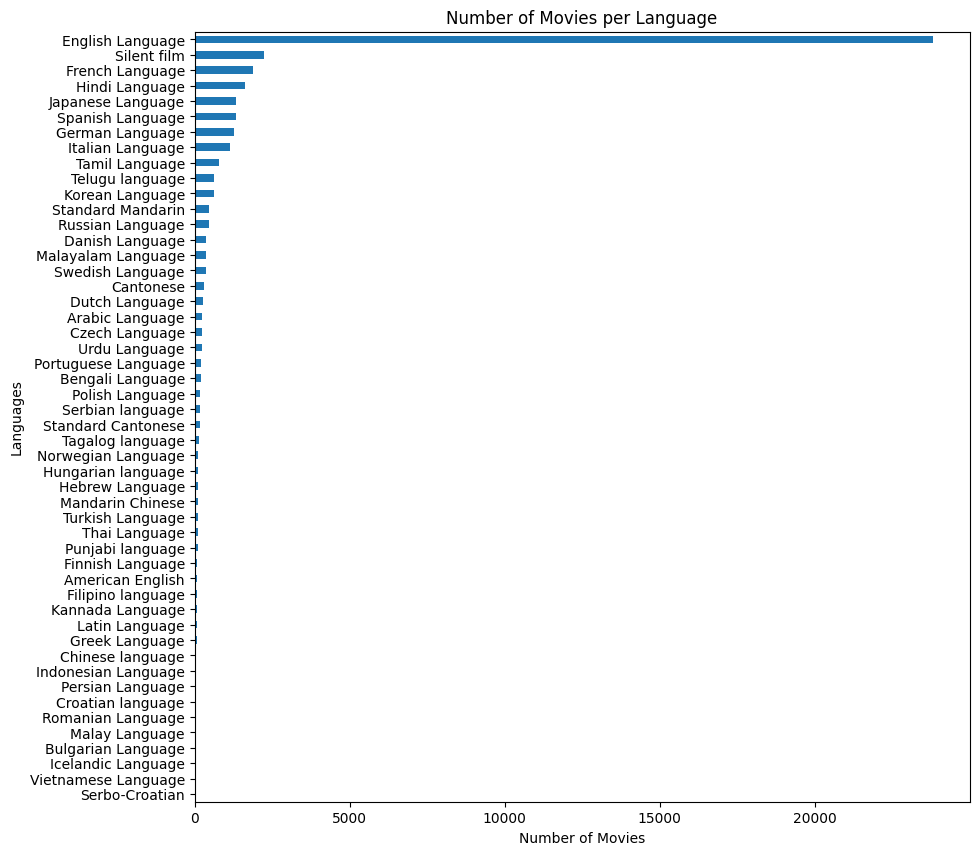

In [25]:
plt.figure(figsize=(10, 10))  
language_counts.head(50).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Movies')
plt.ylabel('Languages')
plt.title('Number of Movies per Language')

plt.show()

clearly most of the movies are in english 

In [26]:
# I don't know if we should cut off language that appear below a certain number 
small_occurrence_count = (language_counts < 50).sum()
small_occurrence_count

148

## Movie Genres 

In [27]:
all_genres = metadata_df['Movie genres'].explode()

genres_counts = all_genres.value_counts()

Text(0.5, 1.0, 'Number of Movies per Genre')

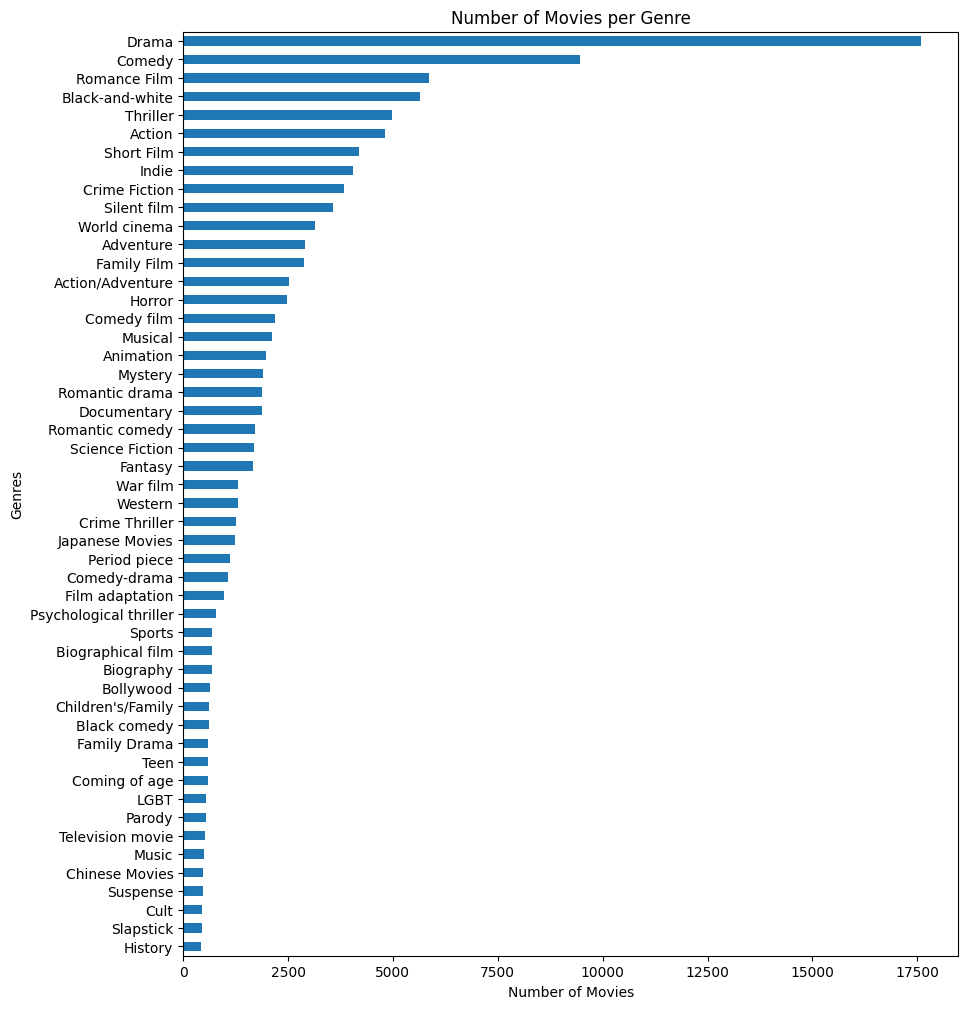

In [28]:
plt.figure(figsize=(10, 12))  
genres_counts.head(50).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.title('Number of Movies per Genre')

## Movie Countries

In [29]:
all_countries = metadata_df['Movie countries'].explode()

countries_counts = all_countries.value_counts()

In [30]:
countries_counts


Movie countries
United States of America    20623
United Kingdom               3352
India                        3298
France                       2295
Japan                        1504
                            ...  
Qatar                           1
Macau                           1
German Language                 1
Uzbek SSR                       1
Haiti                           1
Name: count, Length: 137, dtype: int64

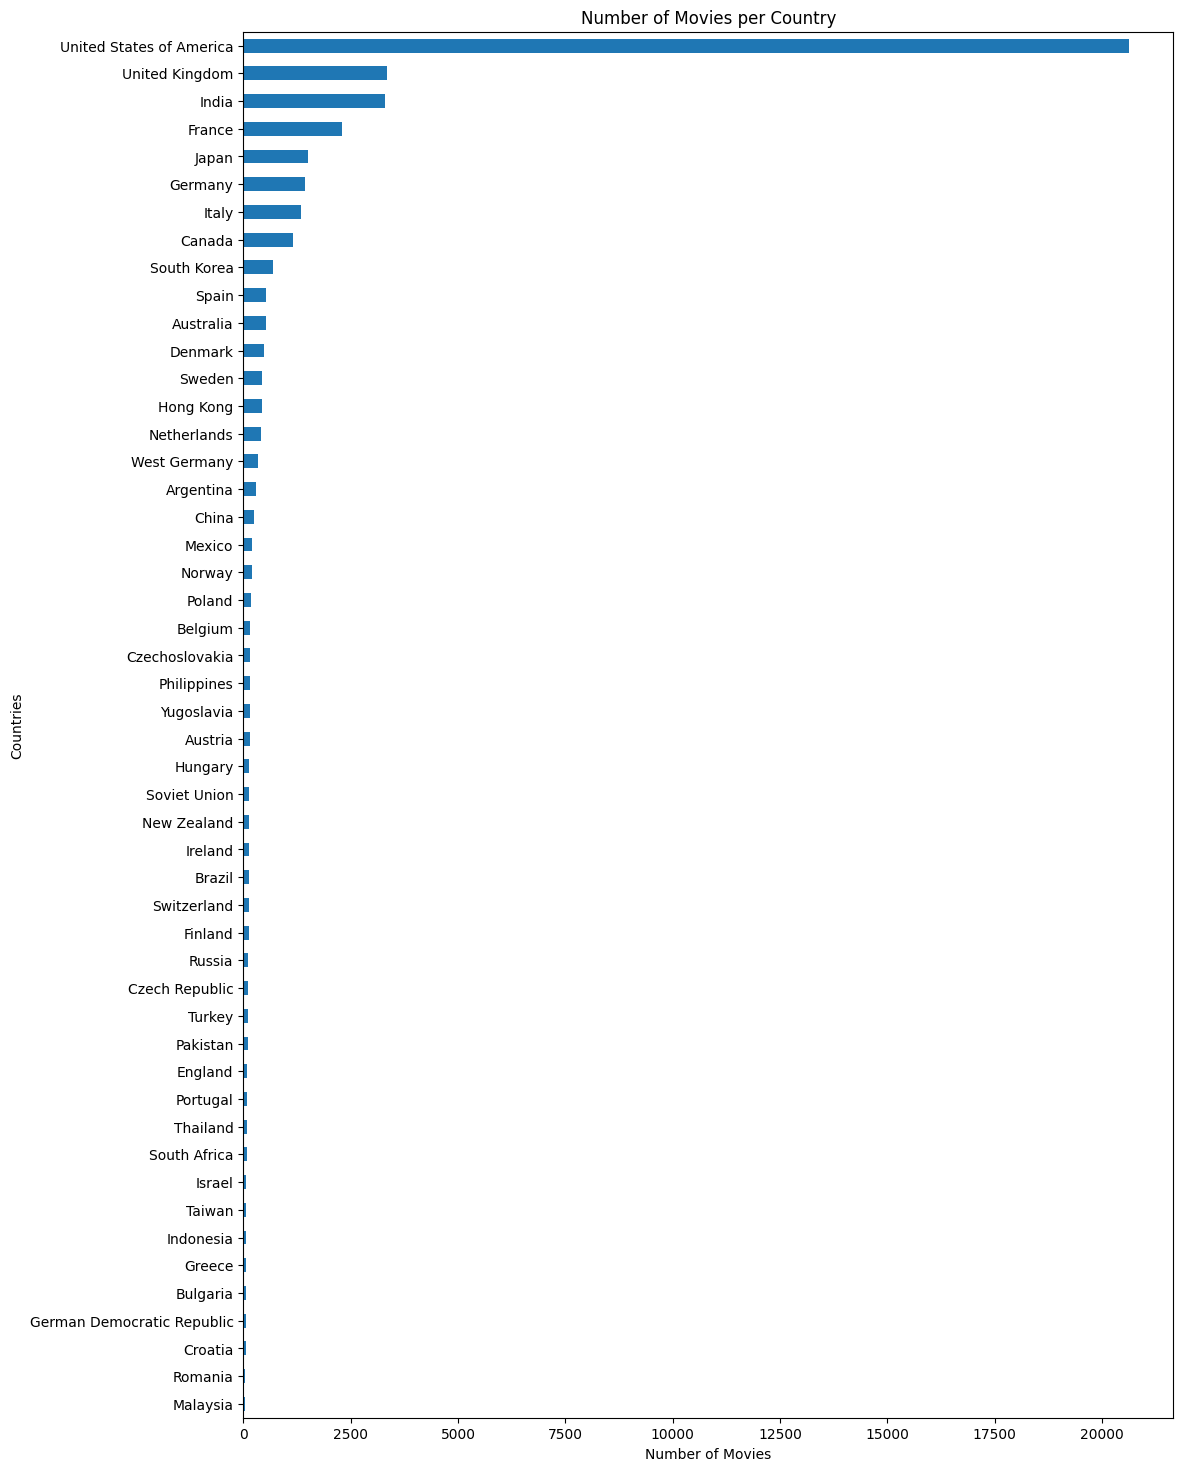

In [31]:
plt.figure(figsize=(12, 18))  
countries_counts.head(50).sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Number of Movies')
plt.ylabel('Countries')
plt.title('Number of Movies per Country')
plt.show()

## Movie Release Year

In [32]:
all_years = metadata_df['Movie release date'].explode()

years_counts = all_years.value_counts()

In [33]:
metadata_df['Movie release date'].max()

2016

In [59]:
"""
plt.figure(figsize=(8, 6))  
plot_years_counts = all_years.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year')
years_label =  all_years.value_counts().sort_values(ascending=True).index
plt.xticks(range(0, len(years_label), 5), years_label[::5], rotation=45)
plt.show()
"""

"\nplt.figure(figsize=(8, 6))  \nplot_years_counts = all_years.value_counts().sort_index().plot(kind='bar')\nplt.xlabel('Years')\nplt.ylabel('Number of Movies')\nplt.title('Number of Movies per Year')\nyears_label =  all_years.value_counts().sort_values(ascending=True).index\nplt.xticks(range(0, len(years_label), 5), years_label[::5], rotation=45)\nplt.show()\n"

## la jai juste plot de facon a ce que les years soient ascending

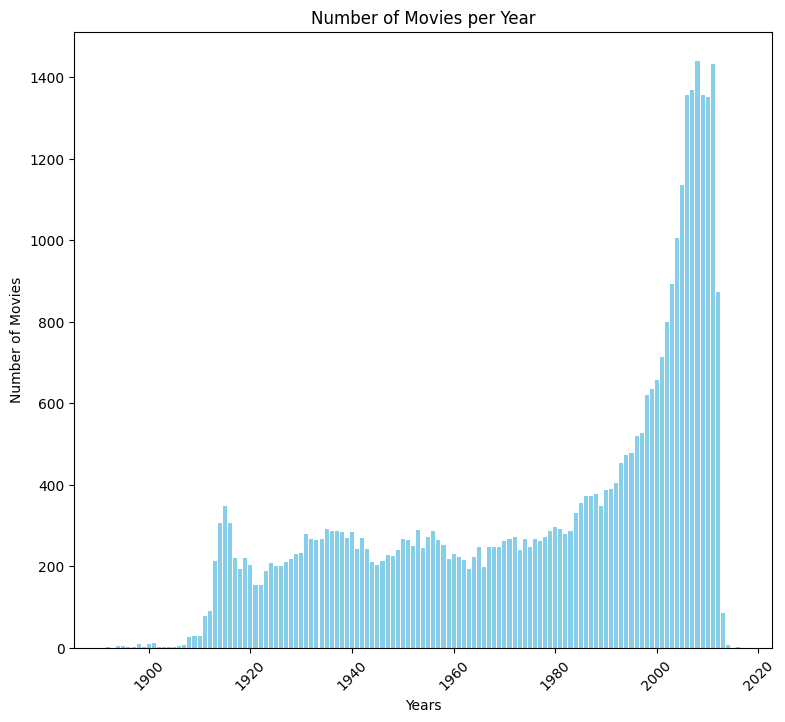

In [35]:
plot_years_counts = all_years.value_counts()

years_sorted = sorted(all_years.unique())

plt.figure(figsize=(9, 8))

plt.bar(years_sorted, [plot_years_counts.get(year, 0) for year in years_sorted], color='skyblue')

plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Year')
plt.xticks(rotation=45)

plt.show()


## Movie per year for top countries 

In [36]:
# Get top 10 countries releasing movies
top_10_countries = countries_counts.head(10).index

# Get one country per row
expanded_df = metadata_df.explode('Movie countries')

# the top 10
top_countries_df = expanded_df[expanded_df['Movie countries'].isin(top_10_countries)]
top_countries_df.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages,Movie countries,Movie genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,[English Language],United States of America,"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,[English Language],United States of America,"[Mystery, Biographical film, Drama, Crime Drama]"
5,13696889,/m/03cfc81,The Gangsters,1913,NaN,35.0,"[Silent film, English Language]",United States of America,"[Short Film, Silent film, Indie, Black-and-whi..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938,3600000.0,106.0,[English Language],United States of America,"[Musical, Comedy, Black-and-white]"
12,6631279,/m/0gffwj,Little city,1997,NaN,93.0,[English Language],United States of America,"[Romantic comedy, Ensemble Film, Comedy-drama,..."


In [37]:
# Count movies per year for each country
movies_per_year_countries = top_countries_df.groupby(['Movie countries', 'Movie release date']).size().unstack(fill_value=0)
movies_per_year_countries.head()

Movie release date,1892,1894,1895,1896,1898,1899,1900,1901,1902,1903,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2016
Movie countries,,,,,,,,,,,,,,,,,,,,,
Canada,0,0,0,0,0,0,0,0,0,0,...,92,79,74,92,68,62,20,3,0,0
France,3,0,1,1,0,1,2,0,1,3,...,66,60,65,95,99,79,45,7,0,0
Germany,0,0,3,0,0,0,0,0,0,0,...,64,48,66,70,44,55,30,1,0,0
India,0,0,0,0,0,0,0,0,0,0,...,146,211,287,201,192,144,213,10,2,0
Italy,0,0,0,0,0,0,0,0,0,0,...,18,20,22,24,22,19,12,1,0,0


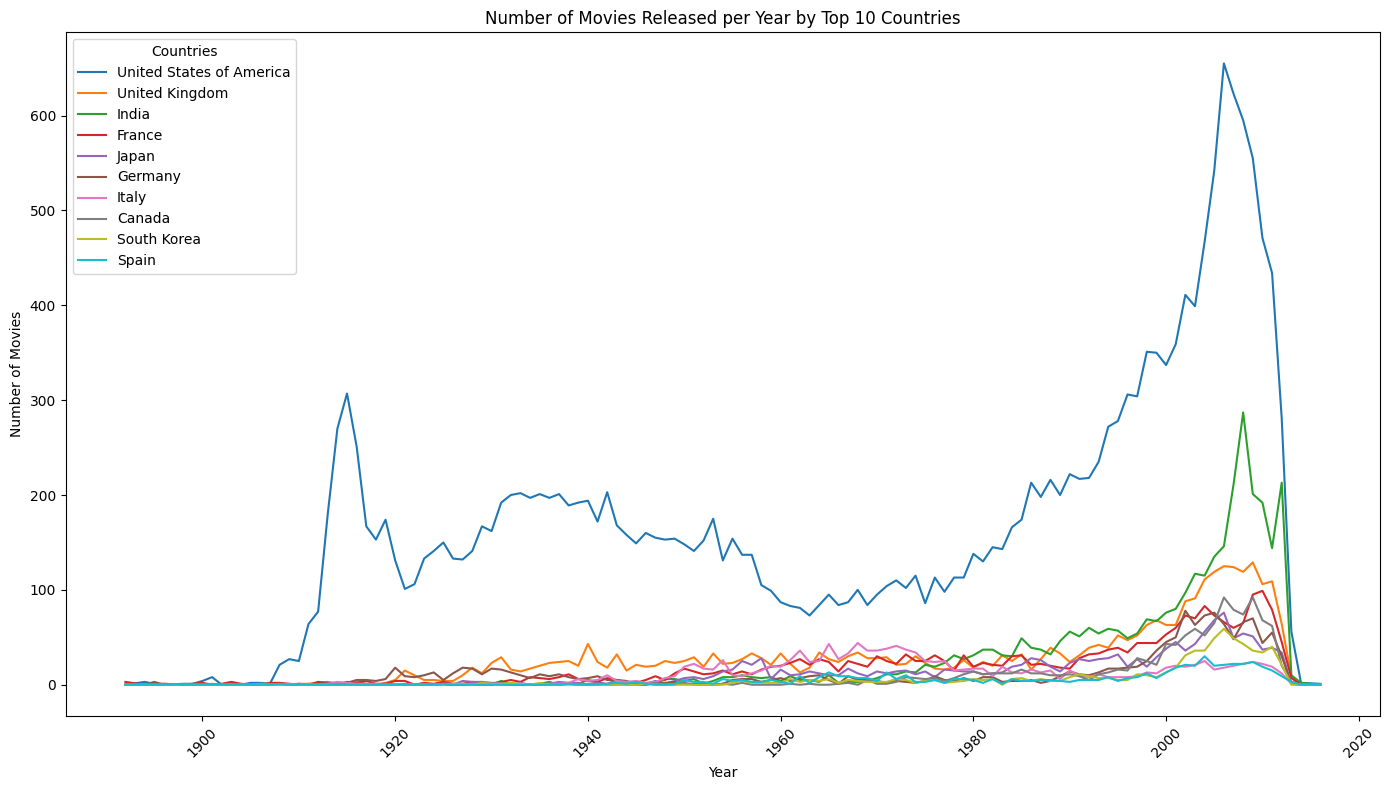

In [38]:
plt.figure(figsize=(14, 8))

# Plot a line for each top country
for country in top_10_countries:
    if country in movies_per_year_countries.index:  
        plt.plot(movies_per_year_countries.columns, movies_per_year_countries.loc[country], label=country)

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year by Top 10 Countries')
plt.legend(title='Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Group by decade by summing every 10 years
movies_per_decade = movies_per_year_countries.groupby((movies_per_year_countries.columns // 10) * 10, axis=1).sum()
movies_per_decade

/var/folders/c3/lx552p8n5hn_0p4zwmkvswr80000gn/T/ipykernel_2077/1893053982.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  movies_per_decade = movies_per_year_countries.groupby((movies_per_year_countries.columns // 10) * 10, axis=1).sum()


Movie release date,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
Movie countries,,,,,,,,,,,,,
Canada,0,0,2,0,2,5,5,10,55,121,154,650,153
France,6,12,16,21,58,54,140,222,261,225,352,698,230
Germany,3,0,28,121,108,40,29,63,44,51,180,633,130
India,0,0,2,3,10,23,64,48,177,369,576,1465,561
Italy,0,2,10,3,12,51,166,313,291,137,102,203,54
Japan,0,0,0,12,15,23,140,121,133,177,256,516,111
South Korea,0,0,0,4,7,1,12,40,37,48,81,370,95
Spain,0,1,0,1,1,9,38,68,58,42,64,211,46
United Kingdom,1,1,16,88,211,240,260,263,230,265,457,1032,288


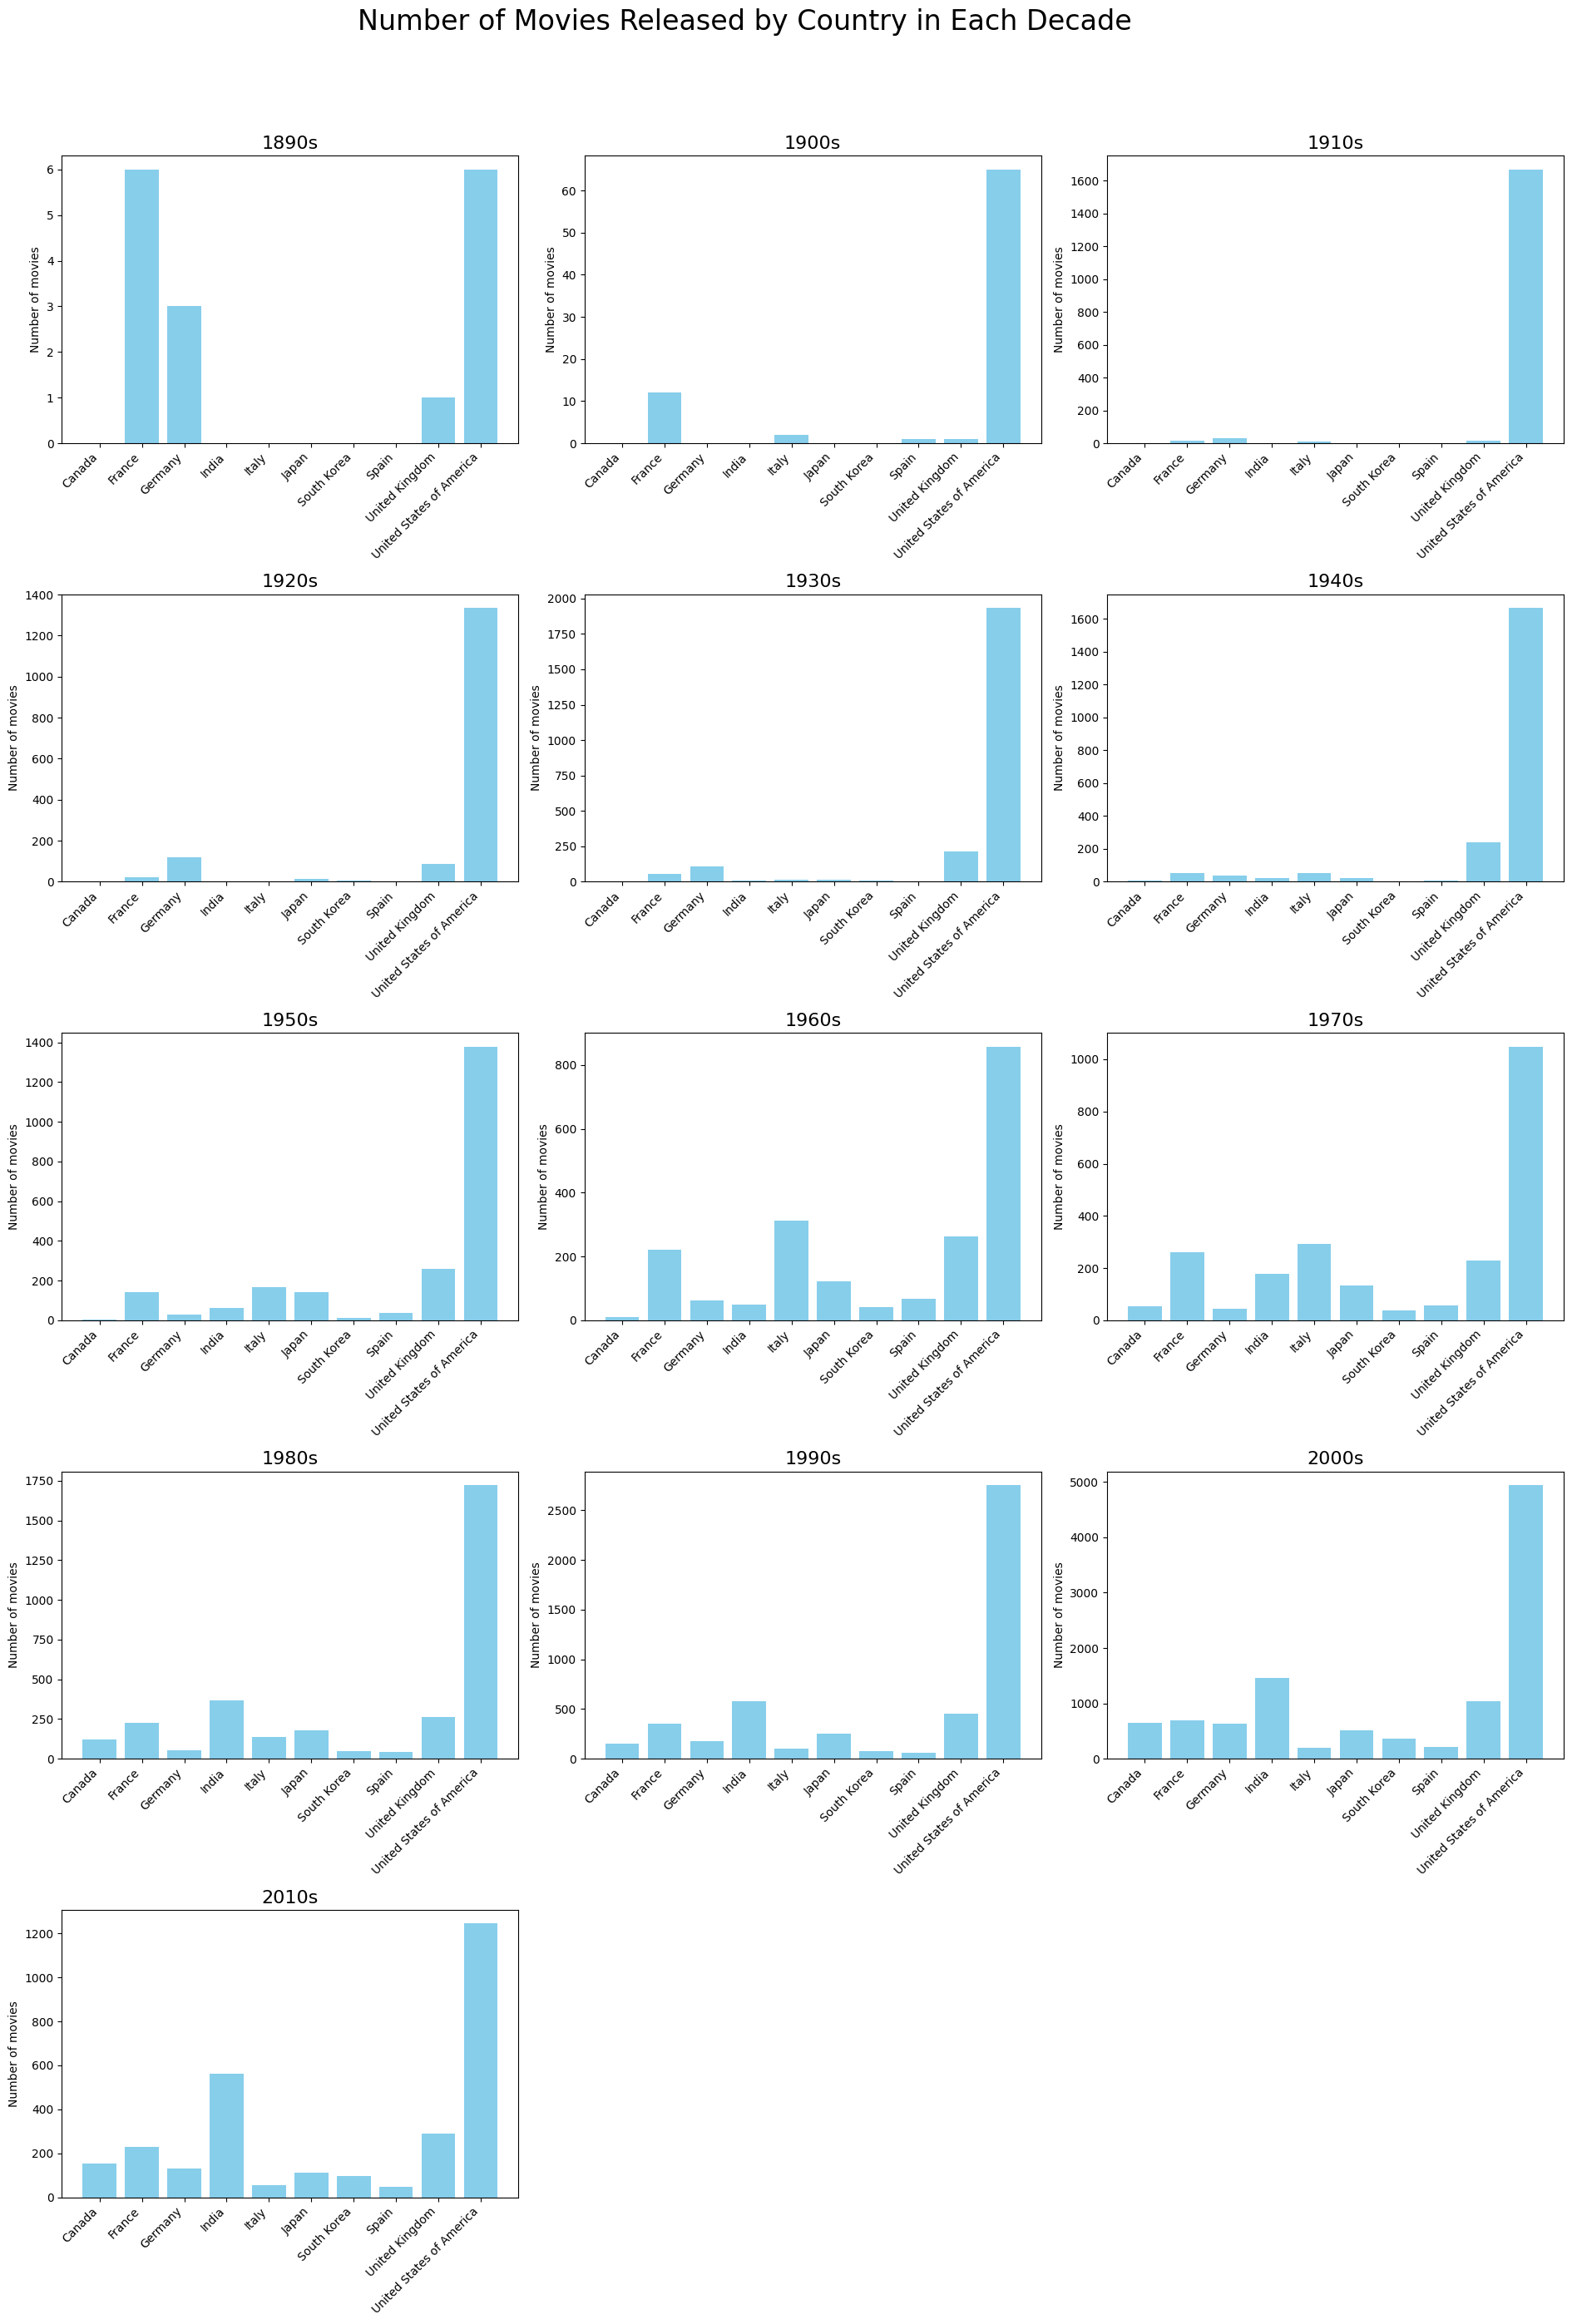

In [40]:
movies_per_decade_by_country = movies_per_decade.T

num_decades = len(movies_per_decade_by_country.index)
rows = 5
cols = 3  

fig, axes = plt.subplots(rows, cols, figsize=(20, 30), sharey=False)
fig.suptitle('Number of Movies Released by Country in Each Decade', fontsize=24)
axes = axes.flatten()

# Plot each decade’s genre distribution in its own subplot
for i, decade in enumerate(movies_per_decade_by_country.index):
    ax = axes[i]  # Get the current subplot
    ax.bar(movies_per_decade_by_country.columns, movies_per_decade_by_country.loc[decade], color='skyblue', width=0.8)
    ax.set_title(f"{decade}s", fontsize=16)
    #ax.set_xlabel('Years', fontsize=12)
    ax.set_ylabel('Number of movies')
    ax.set_xticks(range(len(movies_per_decade_by_country.columns)))
    ax.set_xticklabels(movies_per_decade_by_country.columns, rotation=45, fontsize=10, ha='right')
# Hide any unused subplots if there are fewer decades than grid spots
for j in range(num_decades, len(axes)):
    axes[j].set_visible(False)

#fig.text(0.04, 0.5, 'Number of Movies', va='center', rotation='vertical', fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  
plt.show()


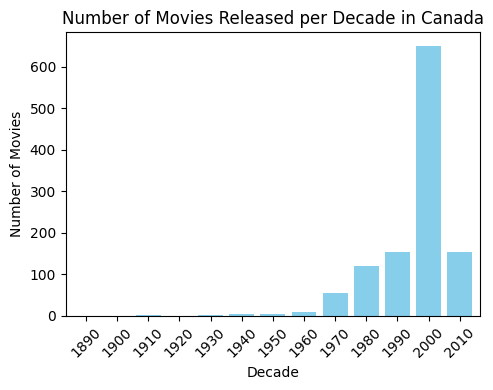

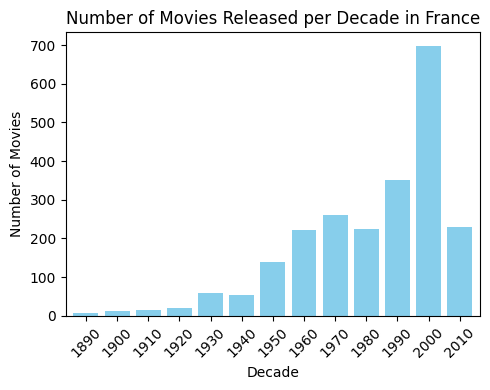

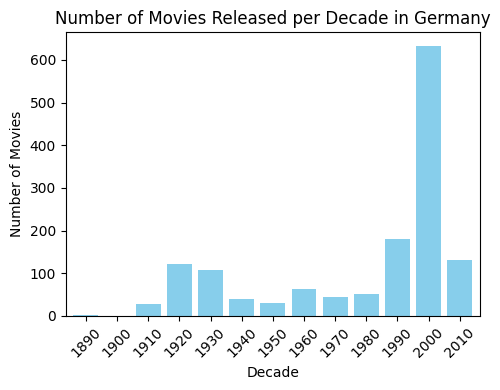

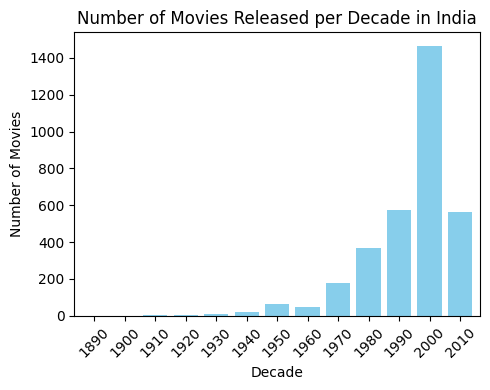

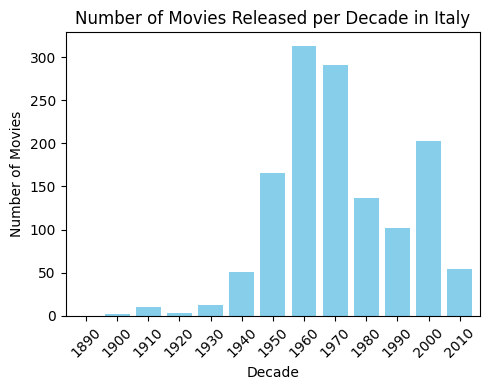

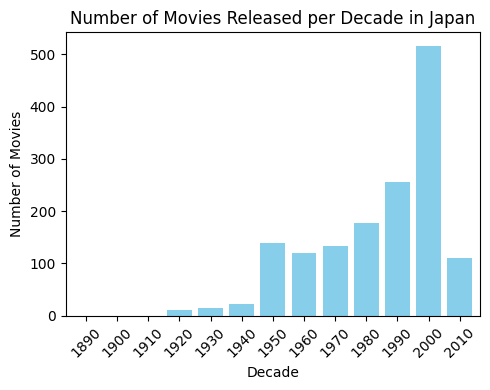

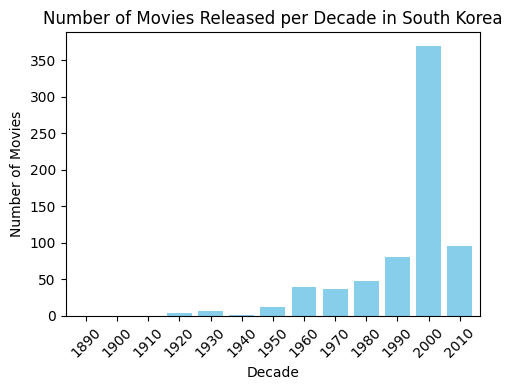

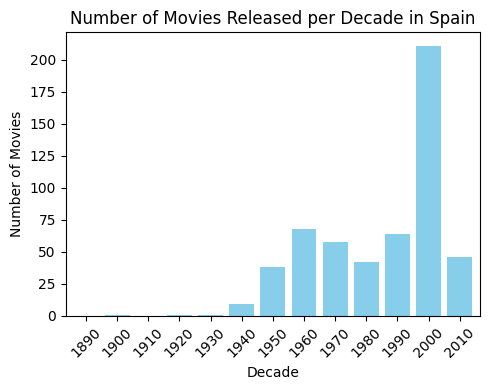

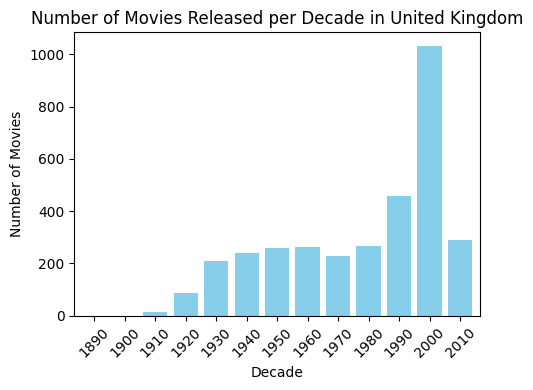

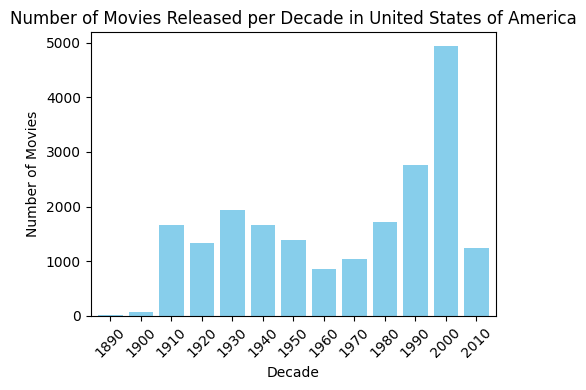

In [41]:
# Plot a bar chart for each country
for country in movies_per_decade.index:
    plt.figure(figsize=(5, 4))
    movies_per_decade.loc[country].plot(kind='bar', color='skyblue', width=0.8)

    # Customize each plot
    plt.xlabel('Decade')
    plt.ylabel('Number of Movies')
    plt.title(f'Number of Movies Released per Decade in {country}')
    plt.xticks(rotation=45)
    
    # Show each plot separately
    plt.tight_layout()
    plt.show()

## Ajouté subplots

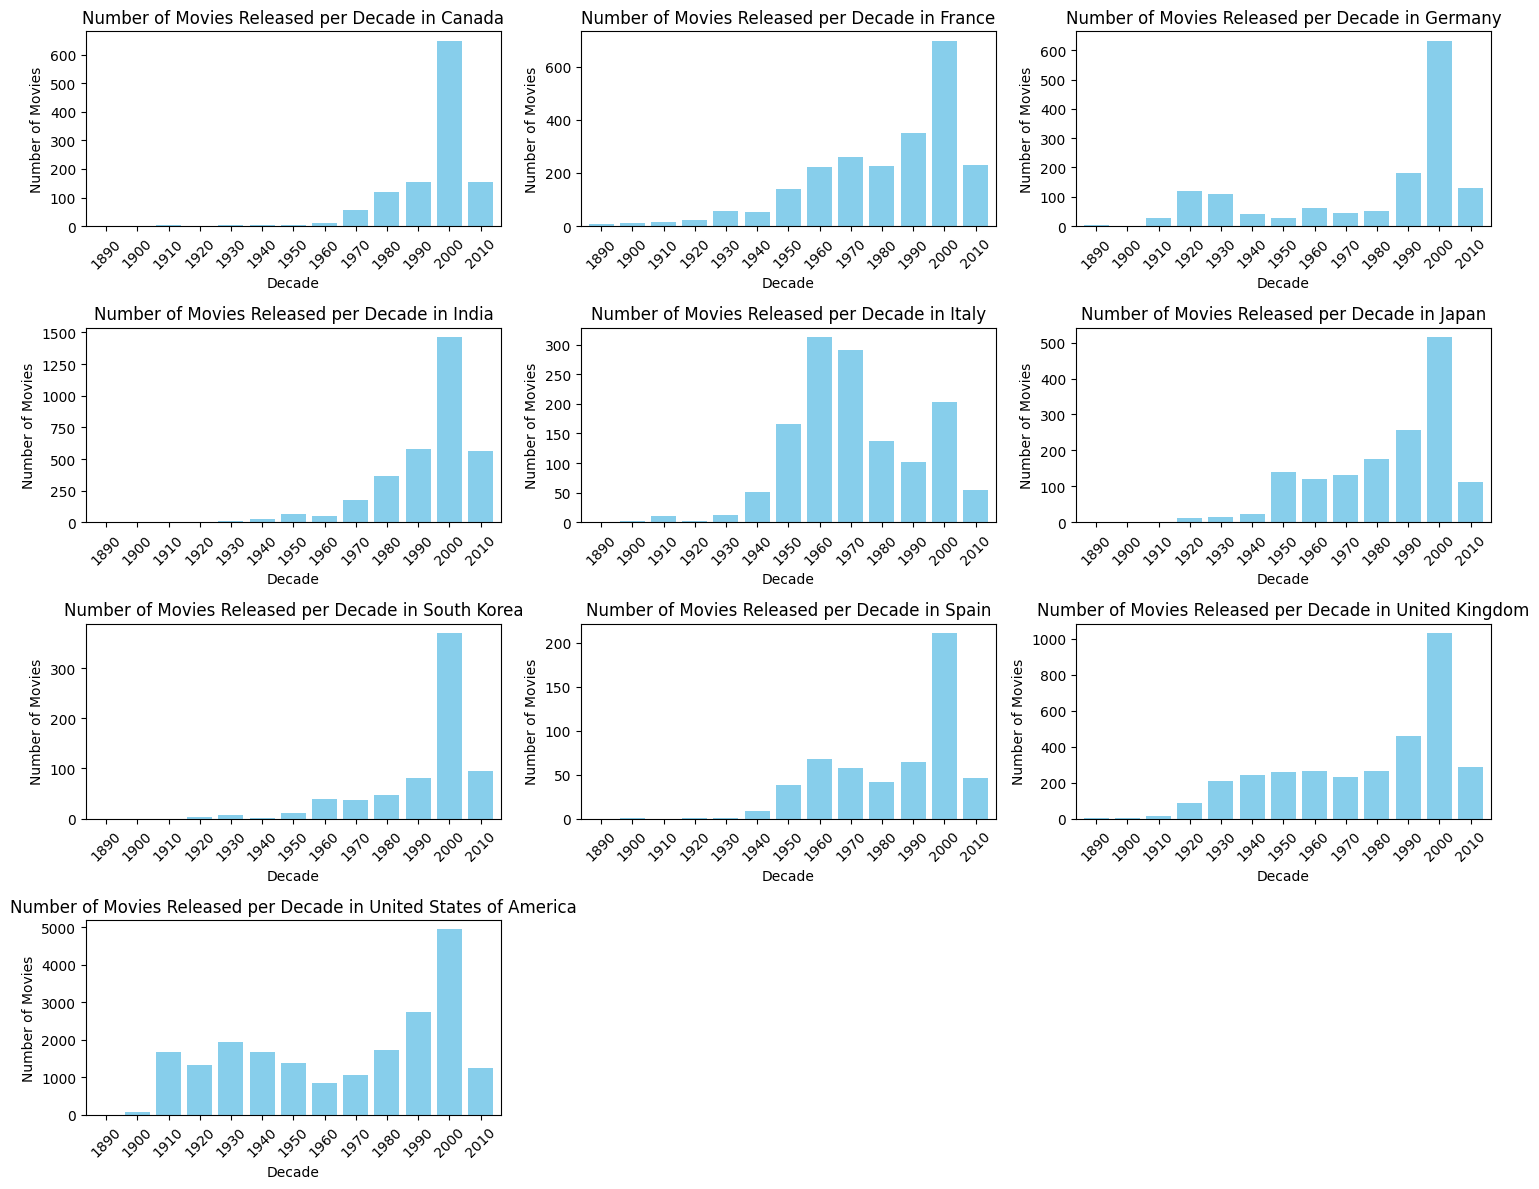

In [42]:
# Define the number of rows and columns for the grid
n_rows, n_cols = 4, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12)) 

axes = axes.flatten()

# Loop through each country and plot the data
for i, country in enumerate(movies_per_decade.index):
    ax = axes[i]
    
    movies_per_decade.loc[country].plot(kind='bar', color='skyblue', width=0.8, ax=ax)

    ax.set_xlabel('Decade')
    ax.set_ylabel('Number of Movies')
    ax.set_title(f'Number of Movies Released per Decade in {country}')
    ax.tick_params(axis='x', rotation=45)

# Remove any empty subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlapping
plt.tight_layout()

plt.show()


## Movie per year for top genre

In [43]:
# Get top 10 countries releasing movies
top_20_genres = genres_counts.head(10).index

# Get one country per row
expanded_df_genre = metadata_df.explode('Movie genres')

# the top 10
top_genres_df = expanded_df_genre[expanded_df_genre['Movie genres'].isin(top_20_genres)]

movies_per_year_genres = top_genres_df.groupby(['Movie genres', 'Movie release date']).size().unstack(fill_value=0)
movies_per_decade_genres = movies_per_year_genres.groupby((movies_per_year_genres.columns // 10) * 10, axis=1).sum()


/var/folders/c3/lx552p8n5hn_0p4zwmkvswr80000gn/T/ipykernel_2077/2998074211.py:11: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  movies_per_decade_genres = movies_per_year_genres.groupby((movies_per_year_genres.columns // 10) * 10, axis=1).sum()


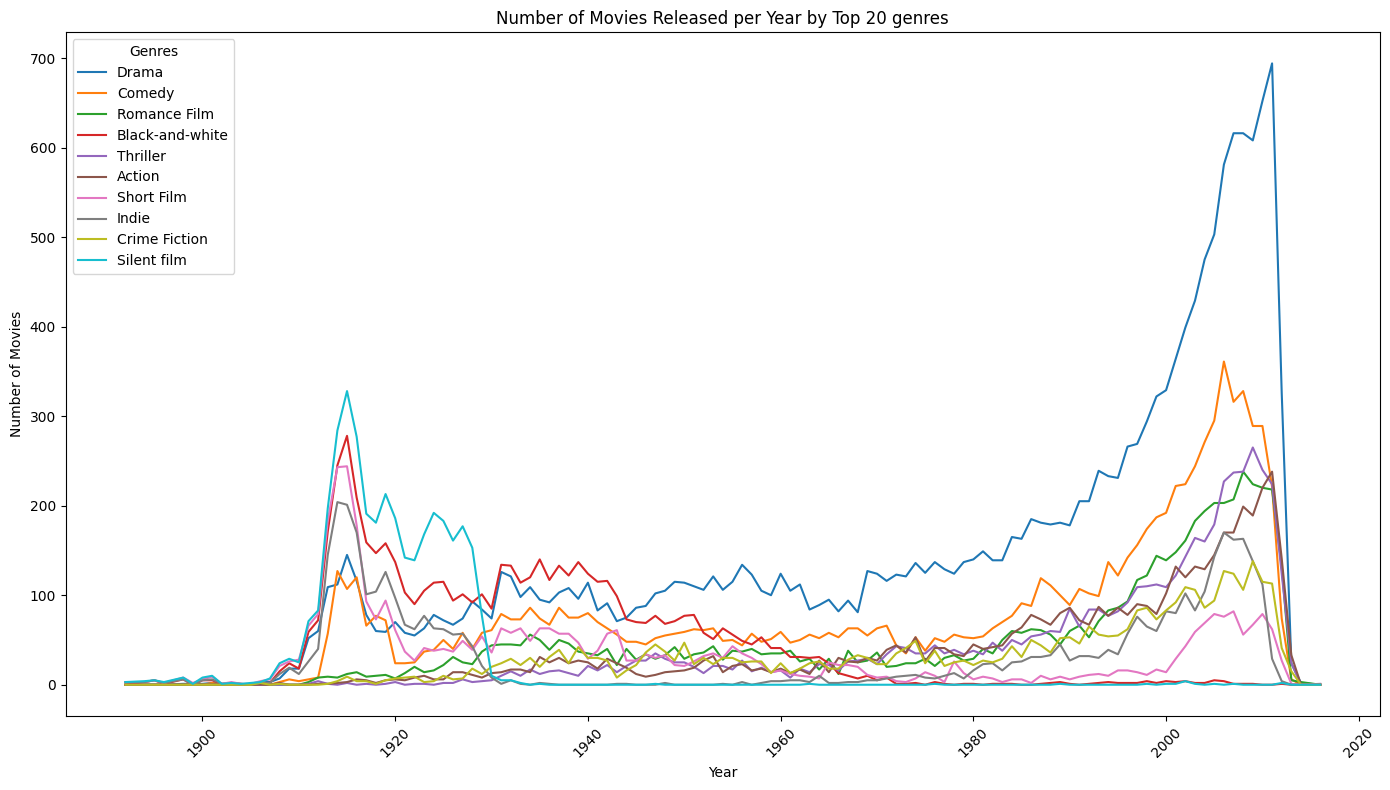

In [44]:
plt.figure(figsize=(14, 8))

# Plot a line for each top country  --> changer top 10
for genre in top_20_genres:
    if genre in movies_per_year_genres.index:  
        plt.plot(movies_per_year_genres.columns, movies_per_year_genres.loc[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released per Year by Top 20 genres')
plt.legend(title='Genres')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

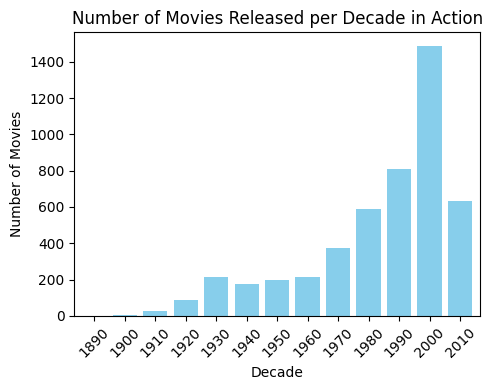

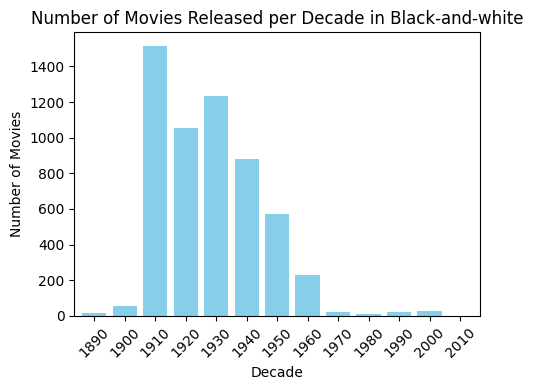

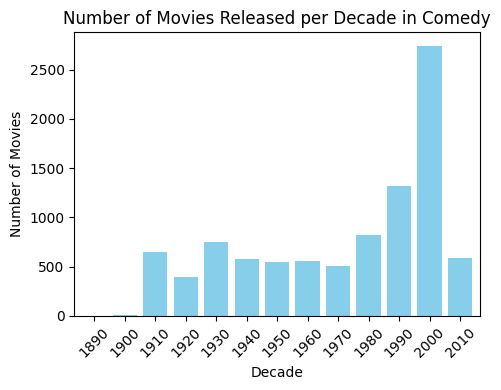

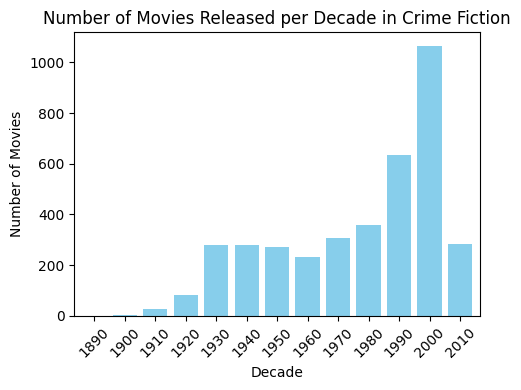

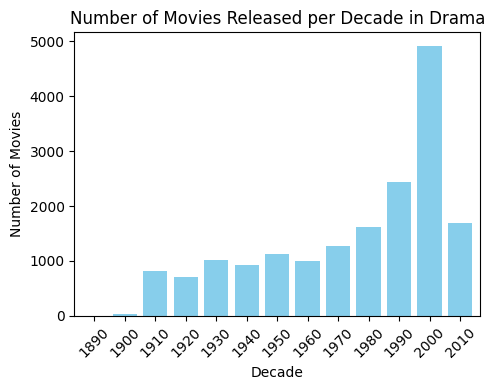

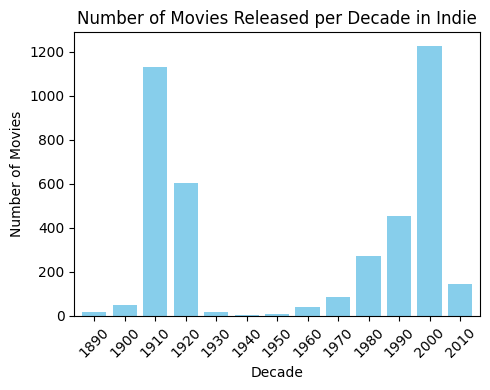

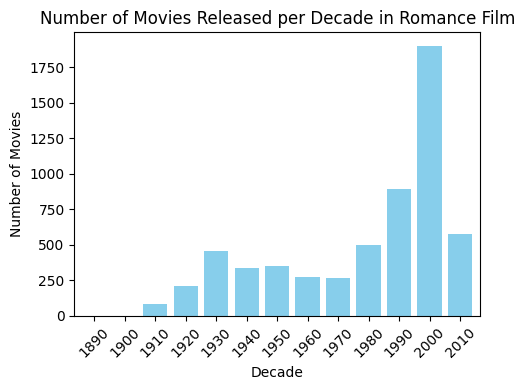

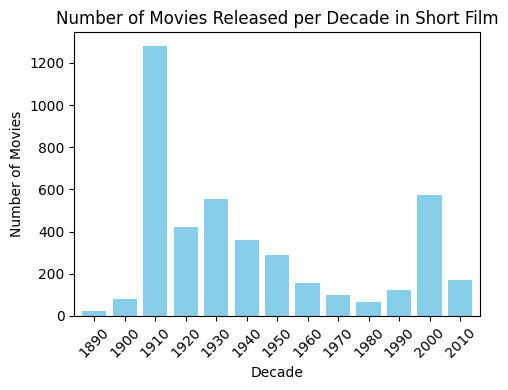

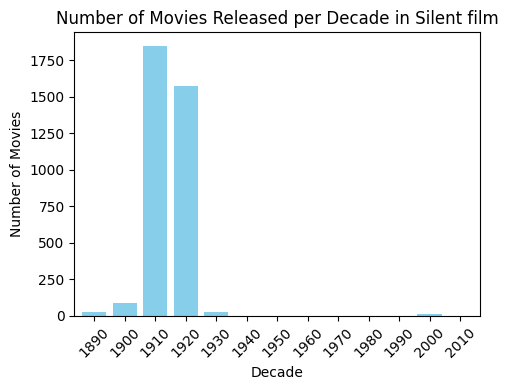

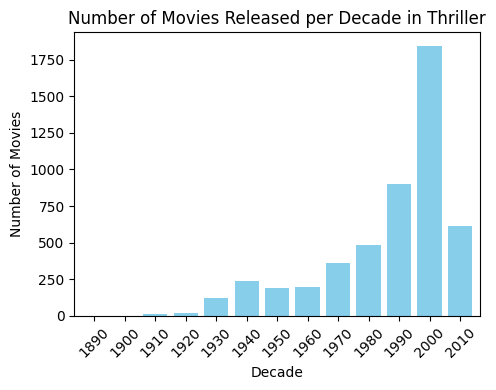

In [60]:
# Plot a bar chart for each genre

for genre in movies_per_decade_genres.index:
    plt.figure(figsize=(5, 4))
    movies_per_decade_genres.loc[genre].plot(kind='bar', color='skyblue', width=0.8)

    # Customize each plot
    plt.xlabel('Decade')
    plt.ylabel('Number of Movies')
    plt.title(f'Number of Movies Released per Decade in {genre}')
    plt.xticks(rotation=45)
    
    # Show each plot separately
    plt.tight_layout()
    plt.show()


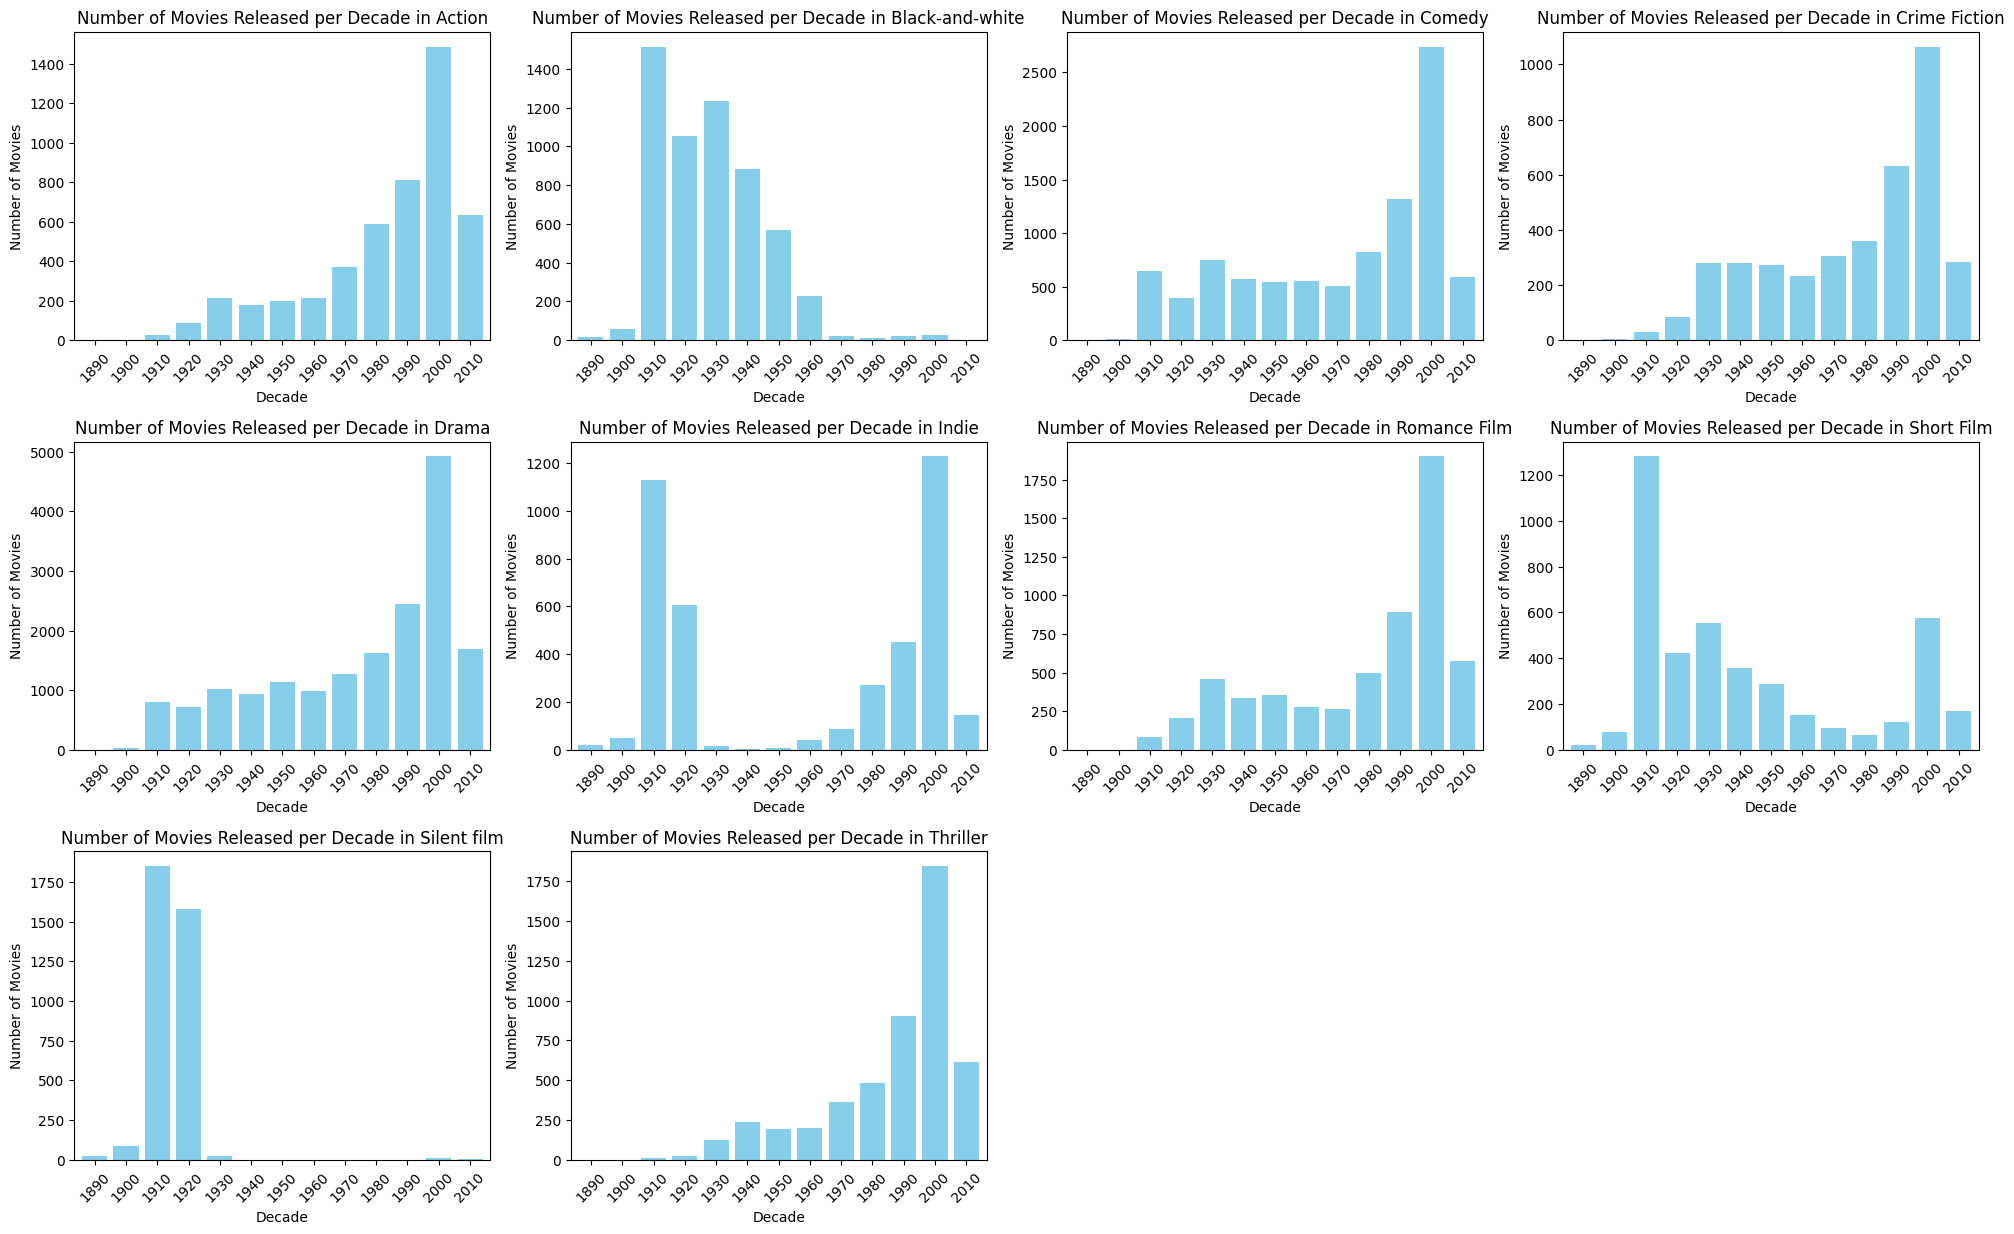

In [46]:
n_rows, n_cols = 5, 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Create a 5x4 grid of subplots
axes = axes.flatten()

# Loop through each genre and plot the data
for i, genre in enumerate(movies_per_decade_genres.index):
    ax = axes[i]
    
    # Plot the bar chart for the current genre
    movies_per_decade_genres.loc[genre].plot(kind='bar', color='skyblue', width=0.8, ax=ax)

    ax.set_xlabel('Decade')
    ax.set_ylabel('Number of Movies')
    ax.set_title(f'Number of Movies Released per Decade in {genre}')
    ax.tick_params(axis='x', rotation=45)

# Remove any empty subplot if there are less than 20 genres (in this case, 20)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

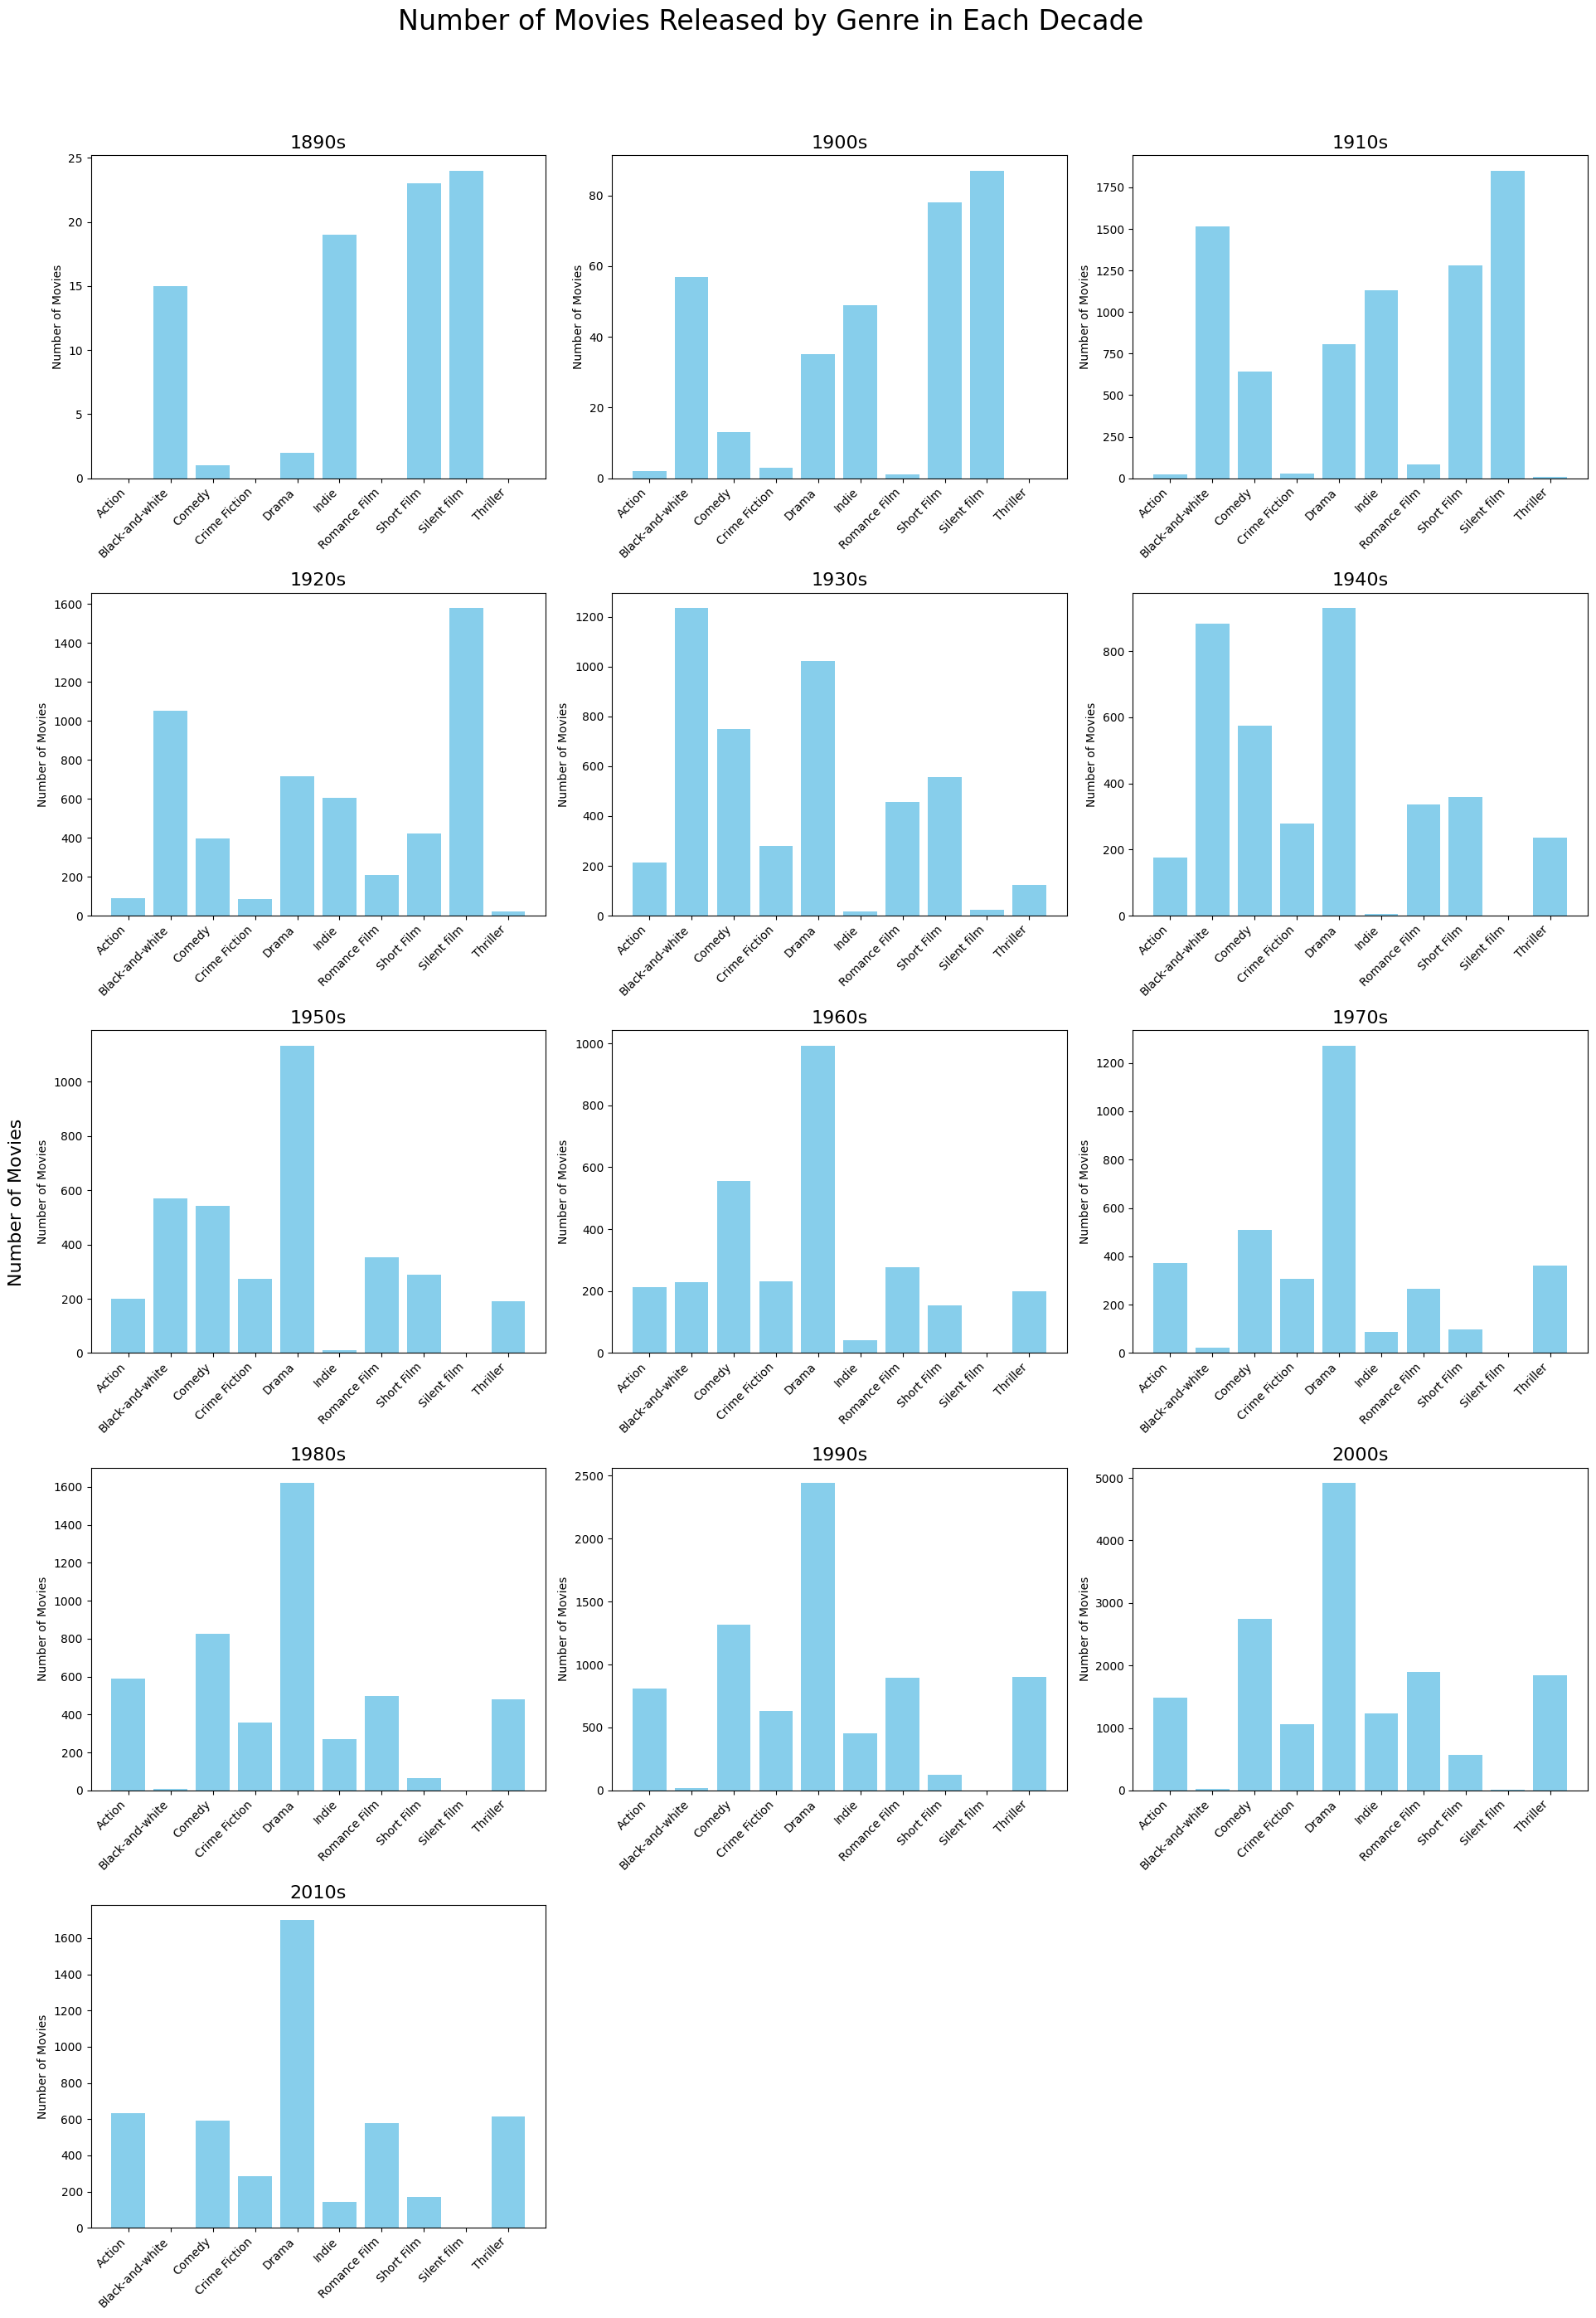

In [47]:
movies_per_decade_by_genre = movies_per_decade_genres.T

num_decades = len(movies_per_decade_by_genre.index)
rows = 5
cols = 3  

fig, axes = plt.subplots(rows, cols, figsize=(20, 30), sharey=False)
fig.suptitle('Number of Movies Released by Genre in Each Decade', fontsize=24)
axes = axes.flatten()

# Plot each decade’s genre distribution in its own subplot
for i, decade in enumerate(movies_per_decade_by_genre.index):
    ax = axes[i]  # Get the current subplot
    ax.bar(movies_per_decade_by_genre.columns, movies_per_decade_by_genre.loc[decade], color='skyblue', width=0.8)
    ax.set_title(f"{decade}s", fontsize=16)
    #ax.set_xlabel('Years', fontsize=12)
    ax.set_ylabel('Number of Movies')
    ax.set_xticks(range(len(movies_per_decade_by_genre.columns)))
    ax.set_xticklabels(movies_per_decade_by_genre.columns, rotation=45, fontsize=10, ha='right')
# Hide any unused subplots if there are fewer decades than grid spots
for j in range(num_decades, len(axes)):
    axes[j].set_visible(False)

fig.text(0.04, 0.5, 'Number of Movies', va='center', rotation='vertical', fontsize=16)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])  
plt.show()


# Summaries

In [48]:
file_movie = 'data/plot_summaries.txt'
sum_df = pd.read_csv(file_movie, sep='\t', header=None)

In [49]:
sum_df.columns = [
    'Wikipedia movie ID',
    'Plot summary'
]

In [50]:
sum_df.head()

,Wikipedia movie ID,Plot summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [51]:
sum_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42303 entries, 0 to 42302
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Wikipedia movie ID  42303 non-null  int64 
 1   Plot summary        42303 non-null  object
dtypes: int64(1), object(1)
memory usage: 661.1+ KB


In [52]:
sum_df.isna().sum()

Wikipedia movie ID    0
Plot summary          0
dtype: int64

In [53]:
# Length of each plot summary
sum_df['summary_length'] = sum_df['Plot summary'].apply(len)

In [54]:
sum_df['summary_length'].describe()

count    42303.000000
mean      1784.034229
std       1808.925536
min         99.000000
25%        508.000000
50%       1079.000000
75%       2604.500000
max      28159.000000
Name: summary_length, dtype: float64

## Word cloud whole summaries

In [55]:
nltk.download('stopwords')

# Define stopwords
stop_words = set(stopwords.words('english'))

# Join all plot summaries into a single string and tokenize
all_text = ' '.join(sum_df['Plot summary'])
words = [word.lower() for word in all_text.split() if word.lower() not in stop_words]

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Plot Summaries')
plt.show()


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/lara/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.12/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
genre_df = metadata_df[['Wikipedia movie ID', 'Movie genres']]

# Merge plot summaries with genres based on the Wikipedia movie ID
merged_df = pd.merge(sum_df, genre_df, on='Wikipedia movie ID', how='left')

merged_df.head()

In [ ]:
sum_df.isna().sum()

In [ ]:
all_genres = merged_df['Movie genres'].explode()  # Explode list of genres per row
top_genres = all_genres.value_counts().head(20)
top_genre_names = top_genres.index.tolist()
top_genre_names

In [ ]:
# Remove 'Movie genres' is NaN
merged_df_genre = merged_df.copy()
merged_df_genre['Movie genres'] = merged_df['Movie genres'].apply(lambda x: x if isinstance(x, list) else [])

top_genre_names = top_genres.index.tolist()

fig, axes = plt.subplots(4, 5, figsize=(25, 20))  # 4 rows, 5 columns 
fig.suptitle('Word Cloud for Top 20 Genres', fontsize=24)
axes = axes.flatten()


for i, genre in enumerate(top_genre_names):
    # Filter summaries that contain the current genre
    genre_summaries = merged_df_genre[merged_df_genre['Movie genres'].apply(lambda genres: genre in genres)]['Plot summary']
    
    # Combine all summaries into one text for the word cloud
    combined_text = ' '.join(genre_summaries)
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(combined_text)
    
    # Plot the word cloud 
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(genre, fontsize=16)

# Hide any unused subplots 
for j in range(len(top_genre_names), len(axes)):
    axes[j].axis('off')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()